In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from scipy.stats import ttest_ind
from statsmodels.tsa.seasonal import seasonal_decompose

# To display up to 100 columns
pd.set_option('display.max_columns', 100)
# To display up to 100 rows
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
warnings.filterwarnings('ignore')

# Read and explore data

In [28]:
df = pd.read_csv('/Users/adamszpilewicz/Documents/languages/python/home_assignment/data/BCV data science take home_data set.csv')
df.head()

,UUID,NAME,TYPE,PERMALINK,CB_URL,RANK,CREATED_AT,UPDATED_AT,LEGAL_NAME,ROLES,DOMAIN,HOMEPAGE_URL,COUNTRY_CODE,STATE_CODE,REGION,CITY,ADDRESS,POSTAL_CODE,STATUS,SHORT_DESCRIPTION,CATEGORY_LIST,CATEGORY_GROUPS_LIST,NUM_FUNDING_ROUNDS,TOTAL_FUNDING_USD,TOTAL_FUNDING,TOTAL_FUNDING_CURRENCY_CODE,FOUNDED_ON,LAST_FUNDING_ON,CLOSED_ON,EMPLOYEE_COUNT,EMAIL,PHONE,FACEBOOK_URL,LINKEDIN_URL,TWITTER_URL,LOGO_URL,ALIAS1,ALIAS2,ALIAS3,PRIMARY_ROLE,NUM_EXISTS,UUID.1,NAME.1,TYPE.1,PERMALINK.1,CB_URL.1,RANK.1,CREATED_AT.1,UPDATED_AT.1,COUNTRY_CODE.1,STATE_CODE.1,REGION.1,CITY.1,INVESTMENT_TYPE,ANNOUNCED_ON,RAISED_AMOUNT_USD,RAISED_AMOUNT,RAISED_AMOUNT_CURRENCY_CODE,POST_MONEY_VALUATION_USD,POST_MONEY_VALUATION,POST_MONEY_VALUATION_CURRENCY_CODE,INVESTOR_COUNT,ORG_UUID,ORG_NAME,LEAD_INVESTOR_UUIDS
0,2d98c4d0-adab-6261-c07e-c92f04b0e4b2,Zello,organization,loudtalks,https://www.crunchbase.com/organization/loudtalks,11655.00,2007-09-08T00:45:42Z,2023-06-19T18:32:27Z,Zello Inc.,company,zello.com,https://zello.com/,USA,TX,Texas,Austin,1717 W 6th Suite 450,78703,operating,Frontline workers save the world everyday. We ...,"Apps,Communities,Enterprise Software,Internet,...","Apps,Community and Lifestyle,Information Techn...",3,20750000,20750000,USD,2011-12-14,2022-06-08,NaN,51-100,info@zello.com,(512) 580-4675,https://www.facebook.com/ZelloMe/,https://www.linkedin.com/company/2478568/,http://twitter.com/Zello,https://images.crunchbase.com/image/upload/t_c...,NaN,NaN,NaN,company,NaN,454e8a0b-7793-41d1-8d33-f2117c70d01d,Series A - Zello,funding_round,loudtalks-series-a--454e8a0b,https://www.crunchbase.com/funding_round/loudt...,330832.00,2022-06-09T06:04:58Z,2022-06-09T06:15:49Z,USA,TX,Texas,Austin,series_a,2022-06-08,20000000.00,20000000.00,USD,NaN,NaN,NaN,2.00,2d98c4d0-adab-6261-c07e-c92f04b0e4b2,Zello,"9d4a3980-c2f7-7611-da40-02483d0dbcc1,313b076c-..."
1,e2eb882f-8a3c-82b6-166f-090316f48972,Aptera,organization,aptera,https://www.crunchbase.com/organization/aptera,6246.00,2008-05-28T11:32:49Z,2023-05-16T09:13:04Z,Aptera Motors Corp.,company,aptera.us,http://www.aptera.us,USA,CA,California,Carlsbad,2778 Loker Ave W,92010,operating,"Aptera Motors is engaged in designing, enginee...","Automotive,Manufacturing,Service Industry","Manufacturing,Other,Transportation",9,100850000,100850000,USD,2006-01-01,2022-06-06,NaN,51-100,info@Aptera.us,(858) 371-3151,https://www.facebook.com/ApteraMotors3.0,https://www.linkedin.com/company/apteramotors,https://twitter.com/aptera_motors,https://images.crunchbase.com/image/upload/t_c...,NaN,NaN,NaN,company,NaN,984266a1-4a2a-4a2f-adba-6ca3b52e954c,Series A - Aptera,funding_round,aptera-series-a--984266a1,https://www.crunchbase.com/funding_round/apter...,552977.00,2021-03-02T07:34:25Z,2021-03-02T07:34:25Z,USA,CA,California,Carlsbad,series_a,2021-02-19,4000000.00,4000000.00,USD,NaN,NaN,NaN,2.00,e2eb882f-8a3c-82b6-166f-090316f48972,Aptera,c51ea9e6-f4e2-4e34-bf35-f08edfab6898
2,d0710c30-f3d6-c119-7c8d-85cec4134e09,Fixie,organization,fixie,https://www.crunchbase.com/organization/fixie,24852.00,2008-07-10T13:53:49Z,2022-03-17T17:51:08Z,NaN,company,fixieconsulting.com,http://www.fixieconsulting.com,USA,WA,Washington,Seattle,1008 Western Ave Suite 400,98104,closed,We are a small agile web development team base...,"Consulting,Software,Web Design,Web Development","Design,Professional Services,Software",1,17000000,17000000,USD,2007-08-01,2023-04-03,NaN,11-50,info@fixieconsulting.com,NaN,NaN,NaN,NaN,https://images.crunchbase.com/image/upload/t_c...,NaN,NaN,NaN,company,NaN,e63c7b70-d543-4294-8018-5c72b0b5d24d,Seed Round - Fixie,funding_round,fixie-seed--e63c7b70,https://www.crunchbase.com/funding_round/fixie...,10024.00,2023-04-05T10:38:14Z,2023-04-05T10:38:14Z,USA,WA,Washington,Seattle,seed,2023-04-03,17000000.00,17000000.00,USD,NaN,NaN,NaN,6.00,d0710c30-f3d6-c119-7c8d-85cec4134e09,Fixie,d29973c3-95ec-691d-defd-6a6ba713c72a
3,051db092-1e48-1d89-4afc-9e5c94b543c9,Conductor,organization,conductor,https://www.crunchbase.com/organization/con

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22301 entries, 0 to 22300
Data columns (total 65 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   UUID                                22301 non-null  object 
 1   NAME                                22301 non-null  object 
 2   TYPE                                22301 non-null  object 
 3   PERMALINK                           22300 non-null  object 
 4   CB_URL                              22300 non-null  object 
 5   RANK                                22277 non-null  float64
 6   CREATED_AT                          22301 non-null  object 
 7   UPDATED_AT                          22301 non-null  object 
 8   LEGAL_NAME                          16670 non-null  object 
 9   ROLES                               22289 non-null  object 
 10  DOMAIN                              22133 non-null  object 
 11  HOMEPAGE_URL                        22133

# Exploratory Data Analysis (EDA)

## Identify and Visualize Top Sectors Receiving Most Investments

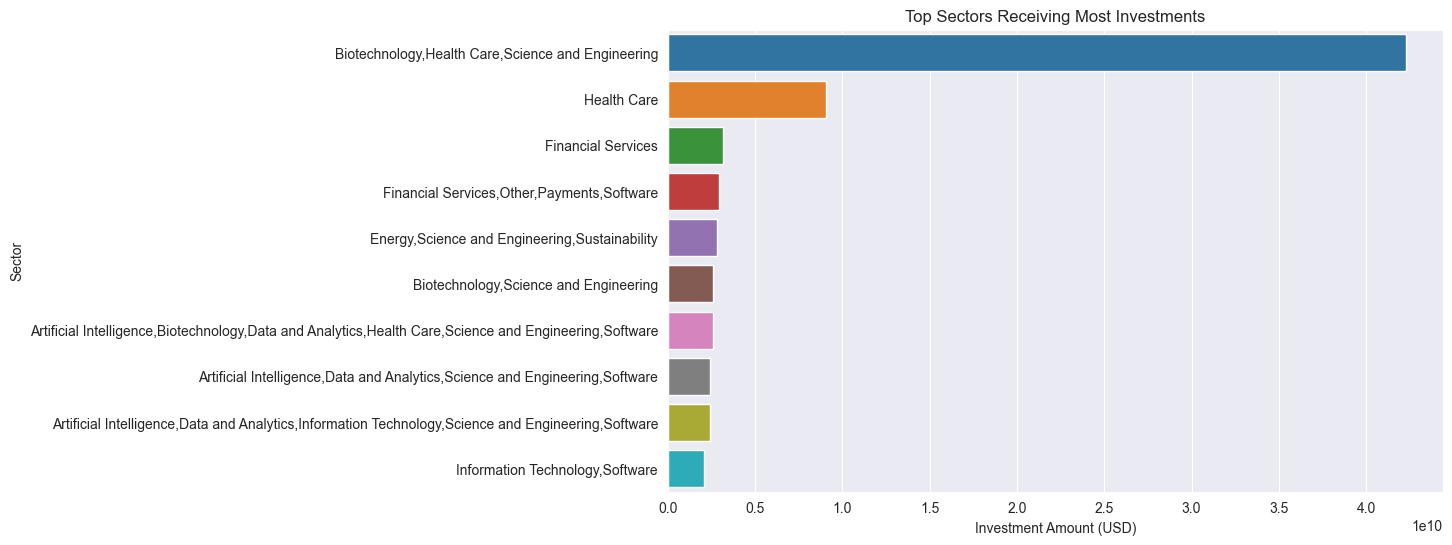

In [5]:
# Assuming 'CATEGORY_GROUPS_LIST' as sectors, and 'RAISED_AMOUNT_USD' as Investment amounts.
sector_investments = df.groupby('CATEGORY_GROUPS_LIST')['RAISED_AMOUNT_USD'].sum().reset_index()

top_sectors = sector_investments.sort_values(by='RAISED_AMOUNT_USD', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='RAISED_AMOUNT_USD', y='CATEGORY_GROUPS_LIST', data=top_sectors)
plt.title('Top Sectors Receiving Most Investments')
plt.xlabel('Investment Amount (USD)')
plt.ylabel('Sector')
plt.show()


## Compare the geographic distribution of startups in H1 ‘23 vs. in H1 ‘22.

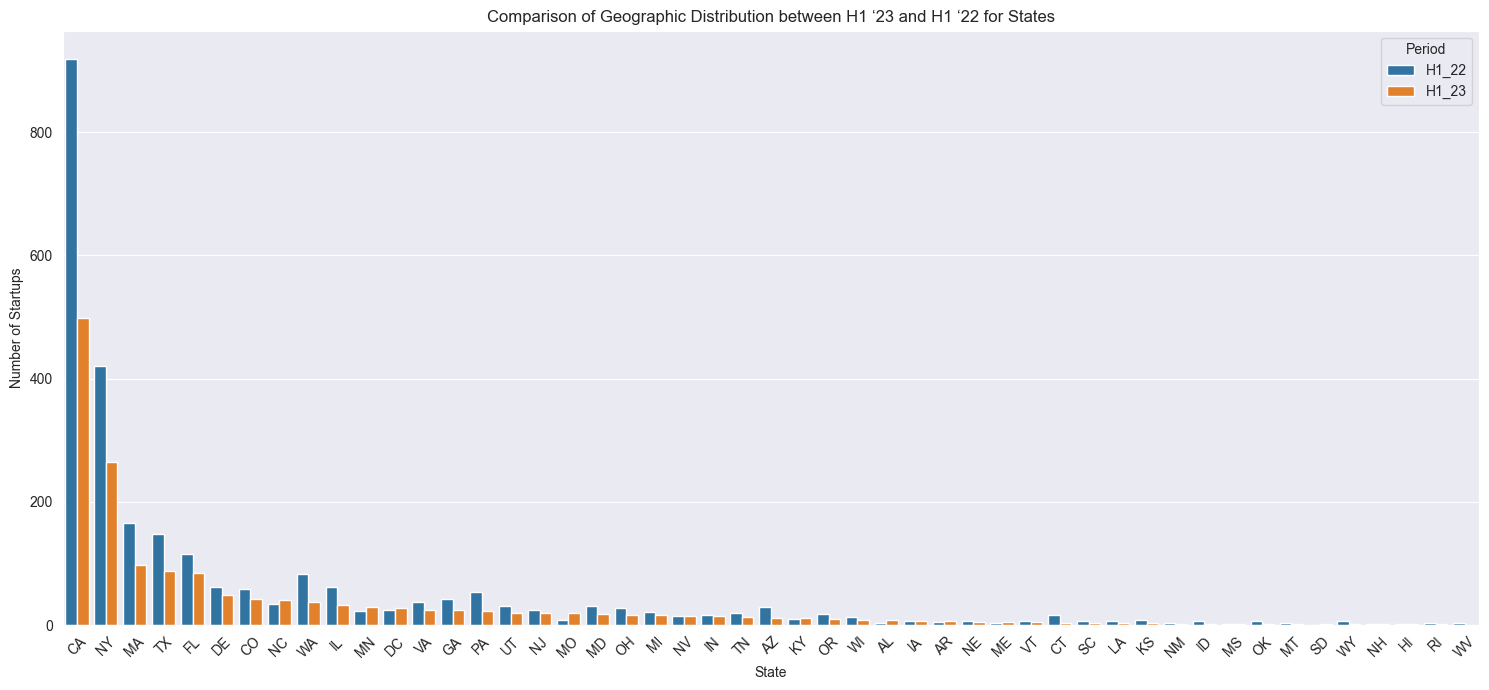

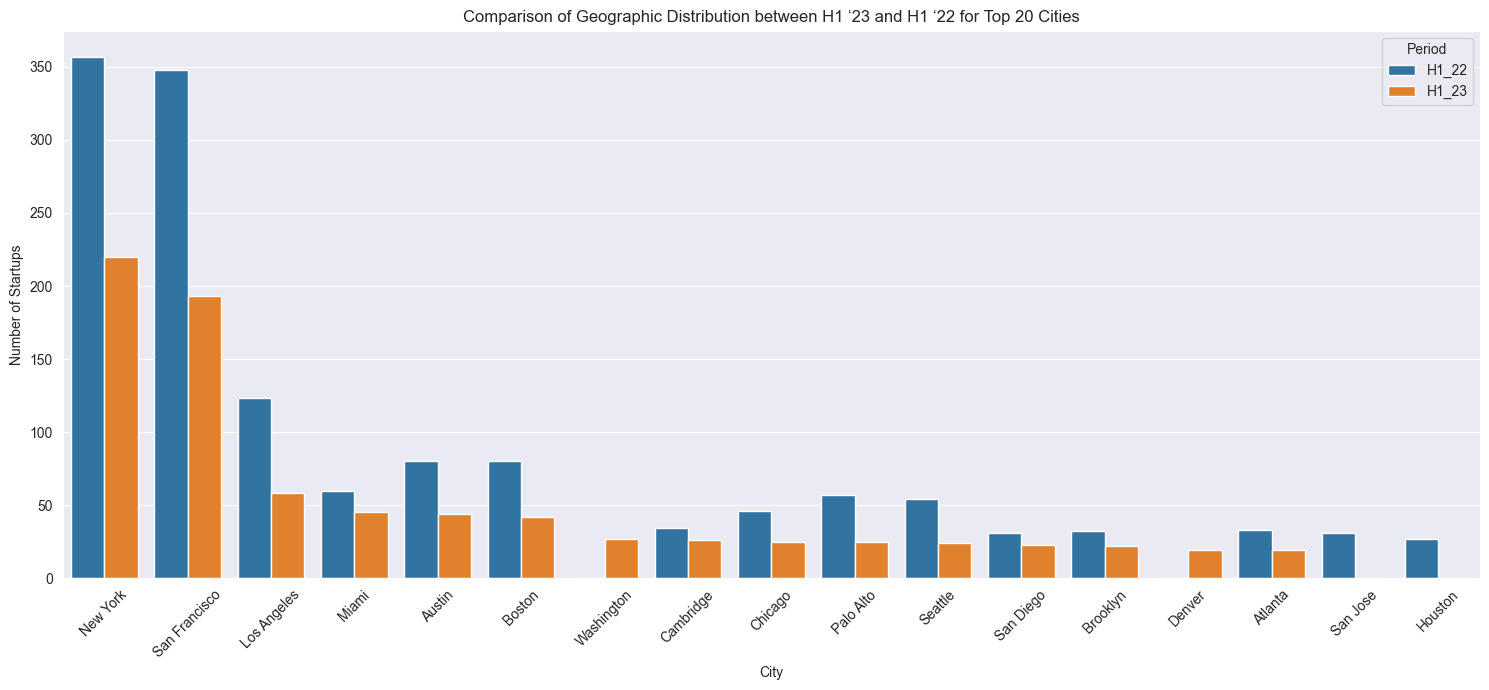

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter DataFrames for the two periods
h1_23 = df[(df['ANNOUNCED_ON'] >= '2023-01-01') & (df['ANNOUNCED_ON'] <= '2023-03-31')]
h1_22 = df[(df['ANNOUNCED_ON'] >= '2022-01-01') & (df['ANNOUNCED_ON'] <= '2022-03-31')]

# For states
state_dist_23 = h1_23['STATE_CODE'].value_counts().reset_index().rename(columns={'STATE_CODE': 'State', 'count': 'H1_23'})
state_dist_22 = h1_22['STATE_CODE'].value_counts().reset_index().rename(columns={'STATE_CODE': 'State', 'count': 'H1_22'})

merged_state_dist = pd.merge(state_dist_23, state_dist_22, on='State', how='outer')
merged_state_dist.fillna(0, inplace=True)

melted_state_df = merged_state_dist.melt(id_vars='State', var_name='Period', value_name='Count')

plt.figure(figsize=(15,7))
sns.barplot(x='State', y='Count', hue='Period', data=melted_state_df, hue_order=['H1_22', 'H1_23'], ci=None)
plt.title('Comparison of Geographic Distribution between H1 ‘23 and H1 ‘22 for States')
plt.xlabel('State')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# For Cities
city_dist_23 = h1_23['CITY'].value_counts().reset_index().rename(columns={'CITY': 'City', 'count': 'H1_23'})
city_dist_22 = h1_22['CITY'].value_counts().reset_index().rename(columns={'CITY': 'City', 'count': 'H1_22'})

merged_city_dist = pd.merge(city_dist_23.head(15), city_dist_22.head(15), on='City', how='outer')
merged_city_dist.fillna(0, inplace=True)

melted_city_df = merged_city_dist.melt(id_vars='City', var_name='Period', value_name='Count')

plt.figure(figsize=(15,7))
sns.barplot(x='City', y='Count', hue='Period', data=melted_city_df, hue_order=['H1_22', 'H1_23'], ci=None)
plt.title('Comparison of Geographic Distribution between H1 ‘23 and H1 ‘22 for Top 20 Cities')
plt.xlabel('City')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Identify the Top 5% of the Investors by count of investors

In [84]:
# Grouping by 'NAME' and applying different aggregation functions to different columns
investor_counts_and_raised_sum = df.groupby('NAME').agg({
    'INVESTOR_COUNT': 'sum',
    'RAISED_AMOUNT_USD': 'sum',
    'CATEGORY_LIST': 'first',
    'STATUS': 'first'  # or 'last' or lambda x: x.mode()[0] for the most frequent value
}).reset_index()

# Sorting the DataFrame by 'INVESTOR_COUNT' in descending order
investor_counts_and_raised_sum = investor_counts_and_raised_sum.sort_values(by='INVESTOR_COUNT', ascending=False)

# Filtering the top 5% of investors
top_investors = investor_counts_and_raised_sum.head(int(0.05 * len(investor_counts_and_raised_sum)))

top_investors

,NAME,INVESTOR_COUNT,RAISED_AMOUNT_USD,CATEGORY_LIST,STATUS
11564,Syndicate,185.00,21800000.00,Cryptocurrency,operating
13315,XMTP,115.00,25000000.00,"Communications Infrastructure,Cryptocurrency,M...",operating
7489,MoonPay,99.00,642000000.00,"Cryptocurrency,Financial Services,FinTech,Mobi...",operating
41,3Box,83.00,30000000.00,"Messaging,Software,Web Development",operating
958,Arta Finance,82.00,90000000.00,"Finance,Financial Services,Wealth Management",operating
...,...,...,...,...,...
4736,Garuda Therapeutics,16.00,134000000.00,"Biotechnology,Health Care,Life Science,Therape...",operating
12971,Voltron Data,16.00,110000000.00,"Analytics,Hardware,Software",operating
4121,Fable,16.00,42250000.00,"Information Technology,Software,Web Development",operating
4383,Float,16.00,7000000.00,"Accounting,B2B,Banking,Finance,Financial Servi...",operating


## Identify the Top 5% of the Investors by sum raised

In [85]:
# Grouping by 'NAME' and applying different aggregation functions to different columns
investor_counts_and_raised_sum = df.groupby('NAME').agg({
    'INVESTOR_COUNT': 'sum',
    'RAISED_AMOUNT_USD': 'sum',
    'CATEGORY_LIST': 'first',
    'STATUS': 'first'  # or 'last' or lambda x: x.mode()[0] for the most frequent value
}).reset_index()

# Sorting the DataFrame by 'INVESTOR_COUNT' in descending order
investor_counts_and_raised_sum = investor_counts_and_raised_sum.sort_values(by='RAISED_AMOUNT_USD', ascending=False)

# Filtering the top 5% of investors
top_investors = investor_counts_and_raised_sum.head(int(0.05 * len(investor_counts_and_raised_sum)))

top_investors


,NAME,INVESTOR_COUNT,RAISED_AMOUNT_USD,CATEGORY_LIST,STATUS
623,Altos Labs,1.00,3000000000.00,"Biopharma,Biotechnology,Health Care,Health Dia...",operating
2697,Commonwealth Fusion,31.00,1800000000.00,"Clean Energy,Electrical Distribution,Energy,En...",operating
961,Articulate,3.00,1500000000.00,"E-Learning,EdTech,Education,Software,Training",operating
10690,Sierra Space,5.00,1400000000.00,"Advanced Materials,Aerospace,Biopharma,Industr...",operating
11806,TeraWatt Infrastructure,6.00,1100000000.00,"Electric Vehicle,Energy Management,Fleet Manag...",operating
...,...,...,...,...,...
1574,Bitwise,44.00,70000000.00,"Blockchain,Cryptocurrency,Financial Services,S...",operating
8956,Pinwheel,23.00,70000000.00,"Financial Services,FinTech,Information Technol...",operating
12156,Torq,7.00,70000000.00,"Cloud Security,Cyber Security,Software",operating
6540,Legit Security,7.00,70000000.00,"SaaS,Software",operating


## Which category is the best to invest in?

### operating

In [106]:
# Filter for operating companies
operating_companies = df[df['STATUS'] == 'operating']

# Drop rows with NaN in 'CATEGORY_LIST', 'NUM_FUNDING_ROUNDS', and 'TOTAL_FUNDING_USD'
operating_companies = operating_companies.dropna(subset=['CATEGORY_LIST', 'NUM_FUNDING_ROUNDS', 'TOTAL_FUNDING_USD'])

# Create a new DataFrame to hold aggregated values
category_aggregate = operating_companies.groupby('CATEGORY_LIST').agg(
    total_funding=pd.NamedAgg(column='TOTAL_FUNDING_USD', aggfunc='sum'),
    num_funding_rounds=pd.NamedAgg(column='NUM_FUNDING_ROUNDS', aggfunc='sum'),
    average_funding=pd.NamedAgg(column='TOTAL_FUNDING_USD', aggfunc='mean'),
    company_count=pd.NamedAgg(column='UUID', aggfunc='count')
).reset_index()

# Sort the DataFrame based on total_funding and num_funding_rounds
category_aggregate = category_aggregate.sort_values(by=['total_funding', 'num_funding_rounds'], ascending=[False, False])

# Display the top category to invest in
category_aggregate.head(10)

,CATEGORY_LIST,total_funding,num_funding_rounds,average_funding,company_count
2779,"Artificial Intelligence,Machine Learning,Natur...",22608140000,20,7536046666.67,3
4986,"Cloud Computing,Cloud Infrastructure,Informati...",5753000000,14,2876500000.00,2
3942,"Biotechnology,Health Care,Therapeutics",4366871555,176,75290888.88,58
3880,"Biotechnology,Health Care,Life Science",4088499217,138,97345219.45,42
3882,"Biotechnology,Health Care,Life Science,Medical",3840198209,48,182866581.38,21
3936,"Biotechnology,Health Care,Pharmaceutical,Thera...",3678870107,95,193624742.47,19
2683,"Artificial Intelligence,Information Technology...",3249951006,26,361105667.33,9
3902,"Biotechnology,Health Care,Medical",3206279792,231,52561963.80,61
4005,"Biotechnology,Medical,Therapeutics",3087884355,61,123515374.20,25
3714,"Biopharma,Biotechnology,Health Care,Health Dia...",3000000000,1,3000000000.00,1


### IPO

In [67]:
# Filter for operating companies
operating_companies = df[df['STATUS'] == 'ipo']

# Drop rows with NaN in 'CATEGORY_LIST', 'NUM_FUNDING_ROUNDS', and 'TOTAL_FUNDING_USD'
operating_companies = operating_companies.dropna(subset=['CATEGORY_LIST', 'NUM_FUNDING_ROUNDS', 'TOTAL_FUNDING_USD'])

# Create a new DataFrame to hold aggregated values
category_aggregate = operating_companies.groupby('CATEGORY_LIST').agg(
    total_funding=pd.NamedAgg(column='TOTAL_FUNDING_USD', aggfunc='sum'),
    num_funding_rounds=pd.NamedAgg(column='NUM_FUNDING_ROUNDS', aggfunc='sum'),
    average_funding=pd.NamedAgg(column='TOTAL_FUNDING_USD', aggfunc='mean'),
    company_count=pd.NamedAgg(column='UUID', aggfunc='count')
).reset_index()

# Sort the DataFrame based on total_funding and num_funding_rounds
category_aggregate = category_aggregate.sort_values(by=['total_funding', 'num_funding_rounds'], ascending=[False, False])

# Display the top category to invest in
category_aggregate.head(10)

,CATEGORY_LIST,total_funding,num_funding_rounds,average_funding,company_count
31,"Biotechnology,Life Science,Therapeutics",1389172597,12,277834519.40,5
21,"Biotechnology,Health Care,Medical",1224000000,8,612000000.00,2
25,"Biotechnology,Health Care,Pharmaceutical",907404986,21,181480997.20,5
6,"Biopharma,Biotechnology",683200000,6,341600000.00,2
7,"Biopharma,Biotechnology,Health Care",558000000,3,558000000.00,1
33,"Biotechnology,Pharmaceutical",550000000,2,550000000.00,1
8,"Biopharma,Biotechnology,Health Care,Pharmaceut...",512500000,4,512500000.00,1
28,"Biotechnology,Health Diagnostics,Pharmaceutica...",504878448,8,252439224.00,2
10,"Biopharma,Biotechnology,Medical,Pharmaceutical",486000000,12,162000000.00,3
22,"Biotechnology,Health Care,Medical,Pharmaceutic...",414001280,10,207000640.00,2


## Feature Correlation Map

In [87]:
numeric_df = df.select_dtypes(include=np.number)
numeric_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17271 entries, 0 to 22300
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RANK                      17252 non-null  float64
 1   NUM_FUNDING_ROUNDS        17271 non-null  int64  
 2   TOTAL_FUNDING_USD         17271 non-null  int64  
 3   TOTAL_FUNDING             17271 non-null  int64  
 4   NUM_EXISTS                35 non-null     float64
 5   RANK.1                    17186 non-null  float64
 6   RAISED_AMOUNT_USD         17271 non-null  float64
 7   RAISED_AMOUNT             17271 non-null  float64
 8   POST_MONEY_VALUATION_USD  1446 non-null   float64
 9   POST_MONEY_VALUATION      1446 non-null   float64
 10  INVESTOR_COUNT            13636 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 1.6 MB


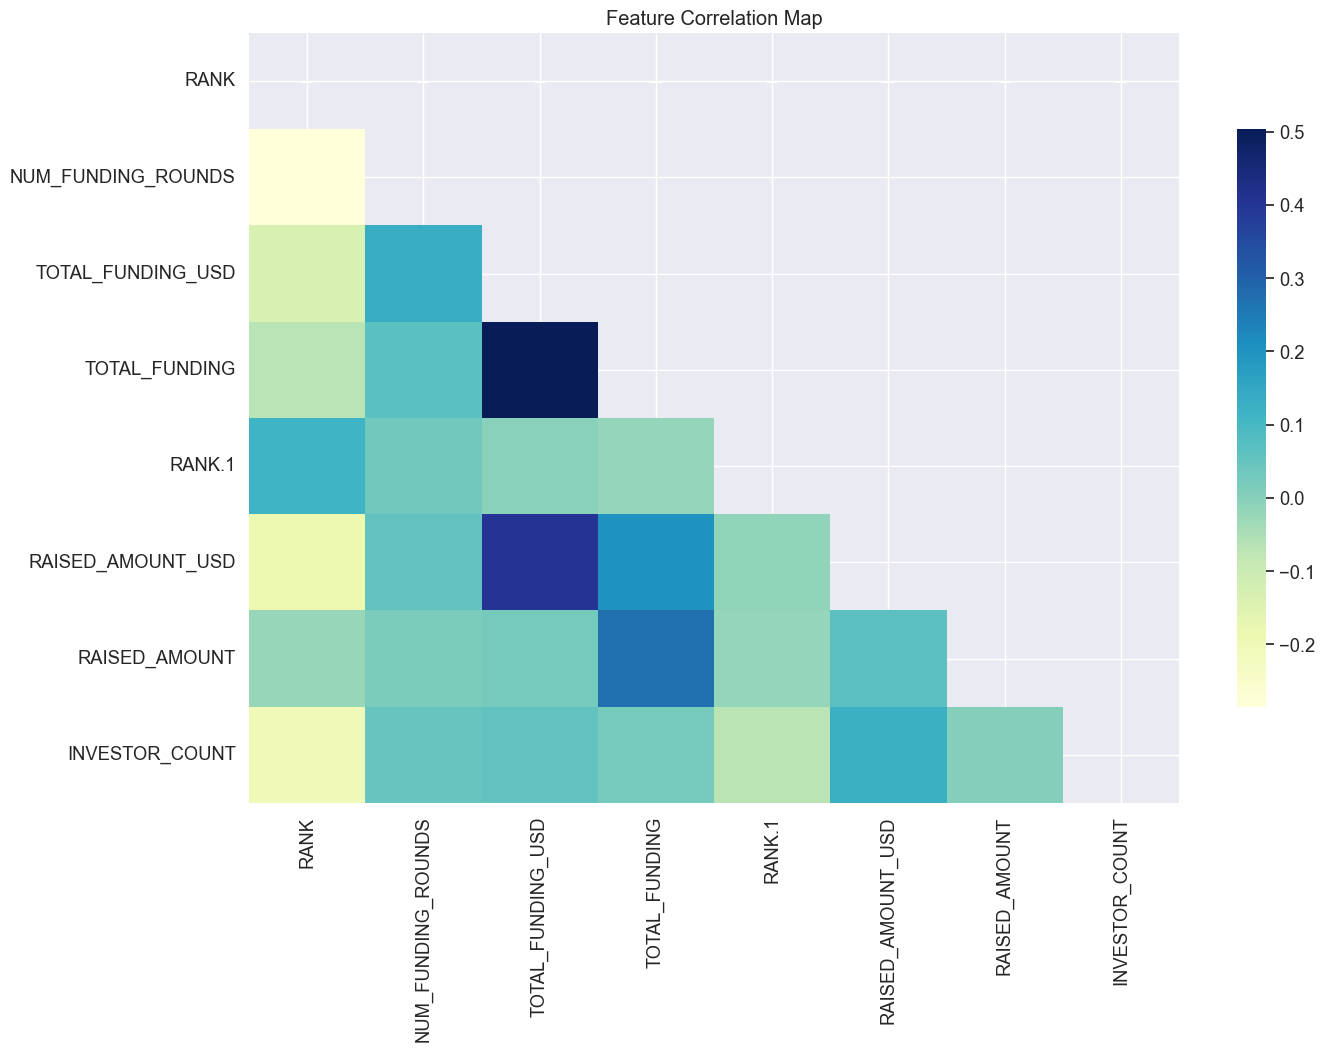

In [88]:
threshold = 0.7  # adjust this value based on your tolerance level
numeric_df_cleaned = numeric_df.dropna(axis=1, thresh=int(threshold*len(df)))
plt.figure(figsize=(15,10))
sns.set(font_scale=1.2)
mask = np.triu(np.ones_like(numeric_df_cleaned.corr(), dtype=bool))
sns.heatmap(numeric_df_cleaned.corr(), annot=True, cmap='YlGnBu', fmt='.2f', mask=mask, cbar_kws={"shrink": 0.75})
plt.title('Feature Correlation Map')
plt.show()

# Statistical Analysis / Machine Learning: (Use appropriate statistical tests.)

## Test the hypothesis: "Startups in the Fintech sector tend to receive more funding than others.”

T-statistic: 0.3432040254093213
P-value: 0.7330217061460966
Fail to Reject the Null Hypothesis: There is no significant difference in funding


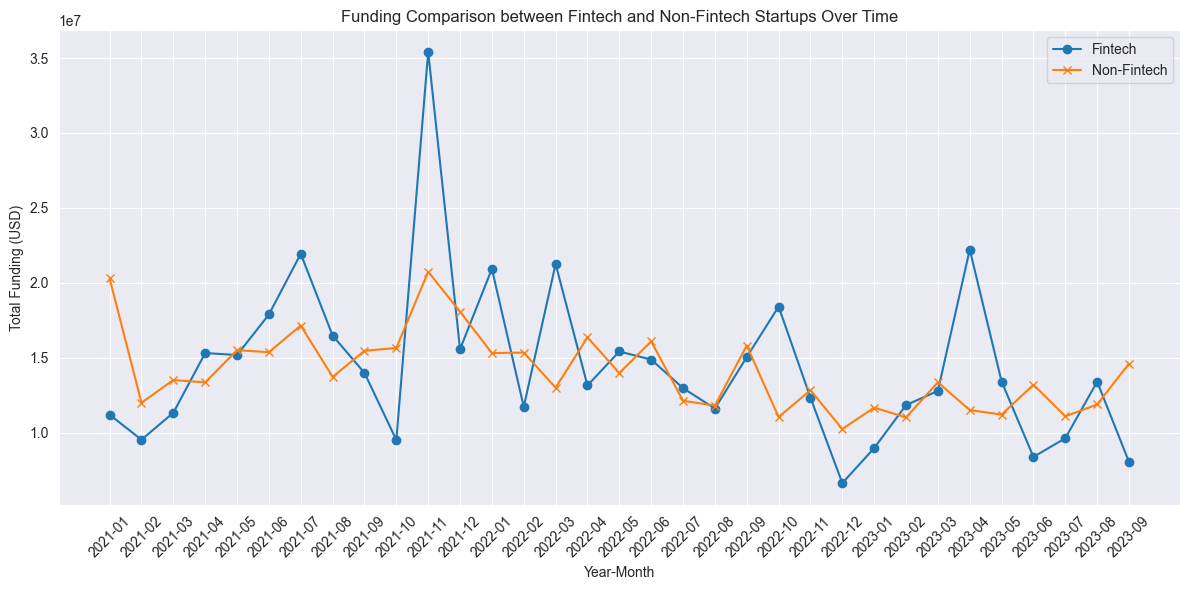

In [57]:
# Convert the 'ANNOUNCED_ON' column to datetime, if not already
df['ANNOUNCED_ON'] = pd.to_datetime(df['ANNOUNCED_ON'])

# Extracting Year and Month to group by
df['YEAR_MONTH'] = df['ANNOUNCED_ON'].dt.to_period('M')

# Filtering DataFrames
fintech = df[df['CATEGORY_LIST'].str.contains('FinTech', na=False)]
non_fintech = df[~df['CATEGORY_LIST'].str.contains('FinTech', na=False)]

# Group by 'YEAR_MONTH' and summing 'RAISED_AMOUNT_USD'
fintech_grouped = fintech.groupby('YEAR_MONTH')['RAISED_AMOUNT_USD'].mean().dropna()
non_fintech_grouped = non_fintech.groupby('YEAR_MONTH')['RAISED_AMOUNT_USD'].mean().dropna()

# Performing the t-test on grouped data
t_stat, p_value = ttest_ind(fintech_grouped, non_fintech_grouped, equal_var=False)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis: There is a significant difference in funding between Fintech and non-Fintech startups.")
else:
    print("Fail to Reject the Null Hypothesis: There is no significant difference in funding")


# Plotting
plt.figure(figsize=(12, 6))
plt.plot(fintech_grouped.index.astype(str), fintech_grouped.values, label='Fintech', marker='o')
plt.plot(non_fintech_grouped.index.astype(str), non_fintech_grouped.values, label='Non-Fintech', marker='x')
plt.xticks(rotation=45)
plt.title('Funding Comparison between Fintech and Non-Fintech Startups Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Funding (USD)')
plt.legend()
plt.tight_layout()
plt.show()

## Can you identify seasonality or trends in the investment data, i.e., are there certain times of the year when startups tend to raise more?

### Trend

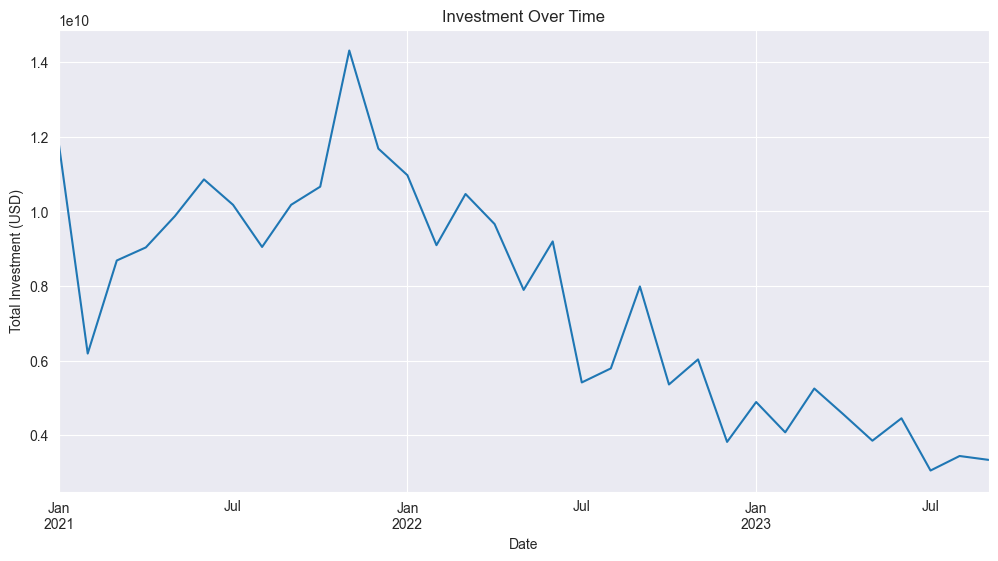

In [58]:
# Assuming 'ANNOUNCED_ON' is the date of investment and 'RAISED_AMOUNT_USD' is the amount of investment.
# Convert 'ANNOUNCED_ON' to datetime if it's not already
df['ANNOUNCED_ON'] = pd.to_datetime(df['ANNOUNCED_ON'])

# Drop NA values in 'RAISED_AMOUNT_USD' for analysis
df.dropna(subset=['RAISED_AMOUNT_USD'], inplace=True)

# Resampling the data on a monthly basis
monthly_investments = df.resample('M', on='ANNOUNCED_ON')['RAISED_AMOUNT_USD'].sum()

# Plotting
plt.figure(figsize=(12,6))
monthly_investments.plot()
plt.title('Investment Over Time')
plt.xlabel('Date')
plt.ylabel('Total Investment (USD)')
plt.show()


### Seasonality

<Figure size 2500x2000 with 0 Axes>

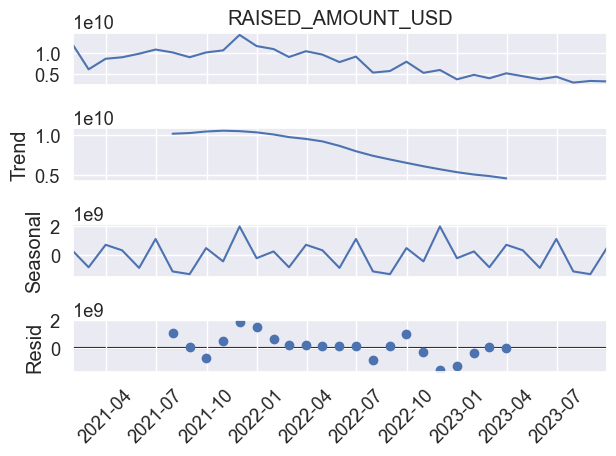

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'ANNOUNCED_ON' is the date of investment and 'RAISED_AMOUNT_USD' is the amount of investment.
# Convert 'ANNOUNCED_ON' to datetime if it's not already
df['ANNOUNCED_ON'] = pd.to_datetime(df['ANNOUNCED_ON'])

# Drop NA values in 'RAISED_AMOUNT_USD' for analysis
df.dropna(subset=['RAISED_AMOUNT_USD'], inplace=True)

# Resampling the data on a monthly basis
monthly_investments = df.resample('M', on='ANNOUNCED_ON')['RAISED_AMOUNT_USD'].sum()

# Decomposing the time series
result = seasonal_decompose(monthly_investments, model='additive')

# Set a large figure size
plt.figure(figsize=(25, 20))

# Plotting the decomposed time series components
result.plot()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plots
plt.tight_layout()
plt.show()




## Bonus ver 1

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Define success metric
df_bonus = df.copy()
df_bonus['is_successful'] = df_bonus['STATUS'].isin(['acquired', 'ipo'])

# Only keep the columns that seem sensible for the model
columns_to_keep = ['NUM_FUNDING_ROUNDS', 'TOTAL_FUNDING_USD', 'FOUNDED_ON', 'EMPLOYEE_COUNT', 
                   'REGION', 'CATEGORY_LIST', 'INVESTOR_COUNT', 'RAISED_AMOUNT_USD', 'is_successful']
df_bonus = df_bonus[columns_to_keep]

# Initialize the imputers
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values and Handle categorical columns
le = LabelEncoder()
for column in df_bonus.columns:
    if df_bonus[column].dtype == 'object':  # Categorical Column
        # Fill missing categorical values with the most frequent category and then apply label encoding
        df_bonus[column] = categorical_imputer.fit_transform(df_bonus[[column]]).ravel()
        df_bonus[column] = le.fit_transform(df_bonus[column])
    elif column != 'is_successful':  # Numerical Column (excluding target)
        # Fill missing numeric values with the mean
        df_bonus[column] = numeric_imputer.fit_transform(df_bonus[[column]]).ravel()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_bonus.drop('is_successful', axis=1),
                                                    df_bonus['is_successful'], test_size=0.2, random_state=42)

# Train a model. Here, using Random Forest Classifier as an example.
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))




Model Accuracy:  0.9748935216319211

Classification Report:
               precision    recall  f1-score   support

       False       0.98      1.00      0.99      4346
        True       0.80      0.03      0.07       115

    accuracy                           0.97      4461
   macro avg       0.89      0.52      0.53      4461
weighted avg       0.97      0.97      0.96      4461


In [51]:
importances = model.feature_importances_
feature_names = X_train.columns

# Mapping feature names to their importance scores
feature_importance_dict = dict(zip(feature_names, importances))

# Sorting features based on importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Displaying sorted features along with their importance scores
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

CATEGORY_LIST: 0.23469343118440775
TOTAL_FUNDING_USD: 0.19089088868952273
FOUNDED_ON: 0.14708348753921302
RAISED_AMOUNT_USD: 0.13581934374838944
REGION: 0.09305700744288876
INVESTOR_COUNT: 0.0813935519315582
NUM_FUNDING_ROUNDS: 0.07250848841929175
EMPLOYEE_COUNT: 0.04455380104472838


## Bonus ver 2

In [55]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Define success metric
df_bonus = df.copy()
df_bonus['is_successful'] = df_bonus['STATUS'].isin(['acquired', 'ipo'])

# Keep only sensible columns
df_bonus = df_bonus[columns_to_keep] 

# Impute missing values and Handle categorical columns
le = LabelEncoder()
for column in df_bonus.columns:
    if df_bonus[column].dtype == 'object':
        df_bonus[column] = categorical_imputer.fit_transform(df_bonus[[column]]).ravel()
        df_bonus[column] = le.fit_transform(df_bonus[column])
    elif column != 'is_successful':
        df_bonus[column] = numeric_imputer.fit_transform(df_bonus[[column]]).ravel()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_bonus.drop('is_successful', axis=1),
                                                    df_bonus['is_successful'], test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the model with the oversampled training data
model_smote = XGBClassifier(random_state=42, objective='binary:logistic')
model_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred_smote = model_smote.predict(X_test)

# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))
print("\nF1 Score: ", f1_score(y_test, y_pred_smote))


Model Accuracy:  0.9681685720690428

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.99      0.98      4346
        True       0.15      0.05      0.08       115

    accuracy                           0.97      4461
   macro avg       0.56      0.52      0.53      4461
weighted avg       0.95      0.97      0.96      4461


F1 Score:  0.0779220779220779


In [56]:
importances = model.feature_importances_
feature_names = X_train.columns

# Mapping feature names to their importance scores
feature_importance_dict = dict(zip(feature_names, importances))

# Sorting features based on importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Displaying sorted features along with their importance scores
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")


NUM_FUNDING_ROUNDS: 0.2510785162448883
INVESTOR_COUNT: 0.2137981355190277
EMPLOYEE_COUNT: 0.1737094670534134
FOUNDED_ON: 0.1461932510137558
REGION: 0.08711184561252594
TOTAL_FUNDING_USD: 0.047528862953186035
CATEGORY_LIST: 0.04030672833323479
RAISED_AMOUNT_USD: 0.04027312248945236
